# DeepEvoOpt: Hyperparameter Optimization for Deep Learning

This notebook provides a UI for running experiments with various meta-heuristic optimizers on CNN and MLP models using Fashion-MNIST.

In [1]:
!git clone https://github.com/A7mdSl7/DeepEvoOpt.git
%cd DeepEvoOpt

Cloning into 'DeepEvoOpt'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 85 (delta 0), reused 12 (delta 0), pack-reused 69 (from 1)
Receiving objects: 100% (85/85), 58.95 MiB | 13.29 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/DeepEvoOpt


In [2]:
import torch
print(torch.cuda.is_available())

True


In [3]:
import os
import sys
import matplotlib.pyplot as plt
import pandas as pd
import json

# Add src to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from src.run_experiments import run_experiment, OPTIMIZERS
from src.train import train_final_model

## Configuration

In [ ]:
MODEL_TYPE = 'cnn' # 'cnn' or 'mlp'
POP_SIZE = 5
MAX_ITER = 5
OPTIMIZERS_TO_TEST = ['fcgwo'] # 'ga', 'pso', 'gwo', 'aco', 'firefly', 'abc', 'obc_woa', 'fcr',

## Run Experiments

In [5]:
results = {}

for opt in OPTIMIZERS_TO_TEST:
    print(f"--- Running {opt.upper()} ---")
    best_sol = run_experiment(opt, MODEL_TYPE, POP_SIZE, MAX_ITER)
    results[opt] = best_sol

--- Running FCGWO ---
Running FCGWO on cnn...
Using device: cuda
FCGWO Iteration 1/5, Best Loss: 0.2639
FCGWO Iteration 2/5, Best Loss: 0.2423
FCGWO Iteration 3/5, Best Loss: 0.2423
FCGWO Iteration 4/5, Best Loss: 0.2396
FCGWO Iteration 5/5, Best Loss: 0.2396
Optimization finished. Best Loss: 0.23955347385019699
Best Hyperparams: {'lr': 0.001953913420855157, 'batch_size': 64, 'dropout': 0.1, 'conv1_out': 64, 'kernel1': 3, 'conv2_out': 128, 'kernel2': 5, 'fc1_out': 128, 'hidden1': 512, 'hidden2': 64, 'optimizer': 'adam'}


## Visualization

/tmp/ipython-input-2456593270.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


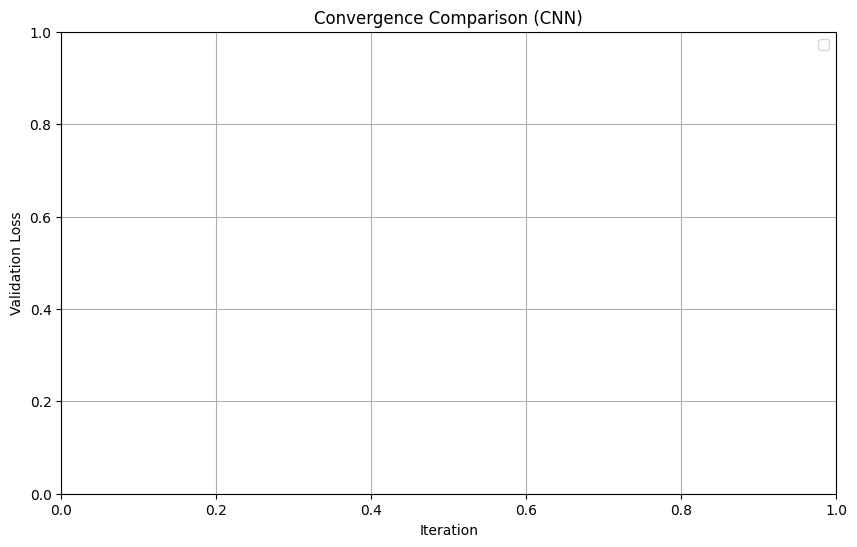

In [6]:
plt.figure(figsize=(10, 6))

for opt in OPTIMIZERS_TO_TEST:
    history_file = f'../results/logs/{opt}_{MODEL_TYPE}_history.csv'
    if os.path.exists(history_file):
        df = pd.read_csv(history_file)
        plt.plot(df['iteration'], df['val_loss'], label=opt.upper(), marker='o')

plt.title(f'Convergence Comparison ({MODEL_TYPE.upper()})')
plt.xlabel('Iteration')
plt.ylabel('Validation Loss')
plt.legend()
plt.grid(True)
plt.show()

## Train Final Model with Best Found Hyperparameters

In [7]:
# Select best optimizer from this run
# For demo, just pick the first one or manually specify
best_opt_name = OPTIMIZERS_TO_TEST[0]
best_params = results[best_opt_name]

print(f"Training final model with params from {best_opt_name.upper()}: {best_params}")
acc = train_final_model(best_params, model_type=MODEL_TYPE, epochs=5)

Training final model with params from FCGWO: {'lr': 0.001953913420855157, 'batch_size': 64, 'dropout': 0.1, 'conv1_out': 64, 'kernel1': 3, 'conv2_out': 128, 'kernel2': 5, 'fc1_out': 128, 'hidden1': 512, 'hidden2': 64, 'optimizer': 'adam'}
Using device: cuda
Starting final training for cnn on cuda...
Epoch 1/5, Train Loss: 0.4284, Val Loss: 0.2918, Val Acc: 0.8933
Epoch 2/5, Train Loss: 0.2741, Val Loss: 0.2580, Val Acc: 0.9082
Epoch 3/5, Train Loss: 0.2295, Val Loss: 0.2363, Val Acc: 0.9135
Epoch 4/5, Train Loss: 0.1998, Val Loss: 0.2315, Val Acc: 0.9160
Epoch 5/5, Train Loss: 0.1790, Val Loss: 0.2544, Val Acc: 0.9105
Final Test Accuracy: 0.9056
Model saved to results/final_model.pth
